# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import seaborn as sns



# Pretty display for notebooks
from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
raws,columns=data.shape
n_records=raws
print(n_records)

45222


In [3]:
# The number of individuals making more than $50000 annually
income_categories=data['income'].value_counts()
n_greater_50k=income_categories[1]
print(n_greater_50k)

11208


In [4]:
# The number of individuals making at most $50000 annually
n_at_most_50k=income_categories[0]
print(n_at_most_50k)

34014


In [5]:
# The percentage of individuals making at more than $50000 annually
income_percentage=data['income'].value_counts(normalize=True)
greater_percent=income_percentage[1]
print(greater_percent)

0.2478439697492371


In [6]:
#feature values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [7]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [8]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
data.describe(exclude=[np.number])

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


<Axes: xlabel='income', ylabel='count'>

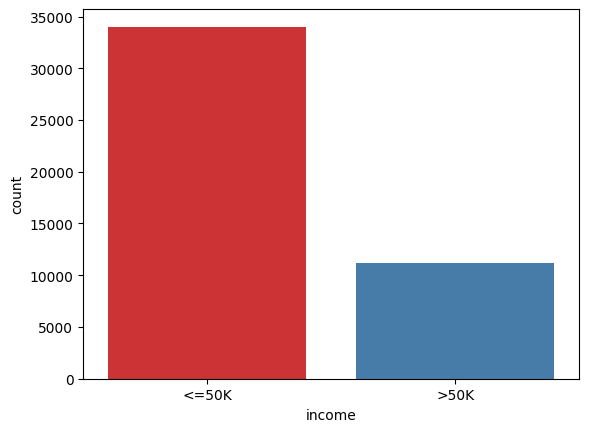

In [10]:
sns.countplot(x='income',data=data,palette='Set1')

### Exercise 2 Preprocessing 

In [11]:
data['age']=data['age'].astype('float64')
data.dtypes

age                float64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [12]:
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

C:\Windows\Temp\ipykernel_23312\531174865.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age']);


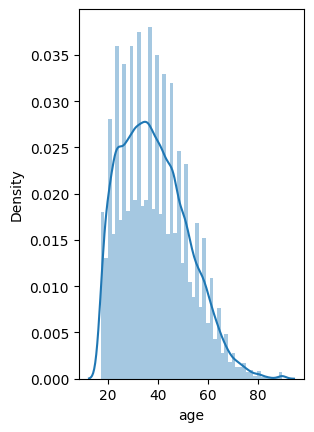

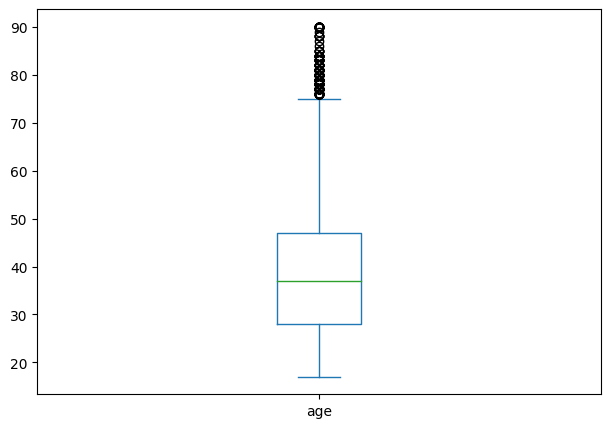

The skewness about age of the original data is 0.5328158942555792
The kurtosis about age of the original data is -0.15587445202596184


C:\Windows\Temp\ipykernel_23312\531174865.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['education-num']);


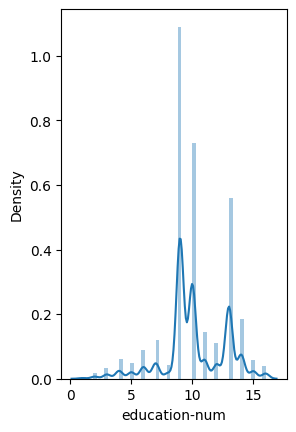

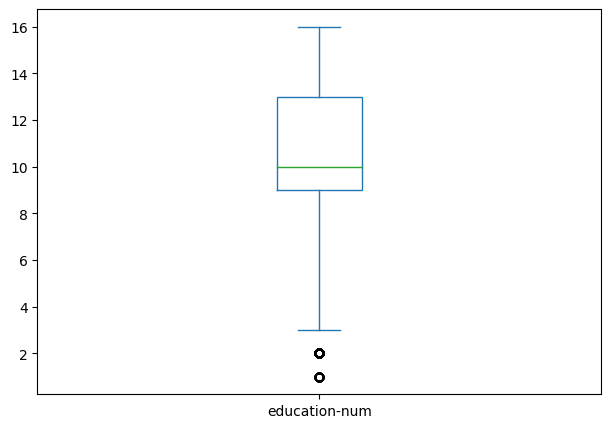

The skewness about education-num of the original data is -0.3106209464770189
The kurtosis about education-num of the original data is 0.6351235822012766


C:\Windows\Temp\ipykernel_23312\531174865.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-gain']);


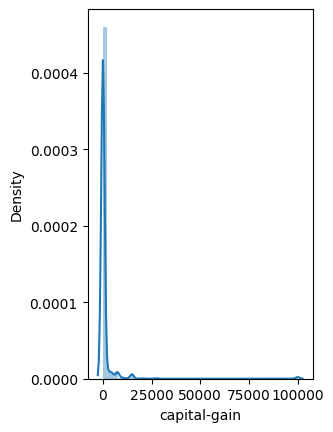

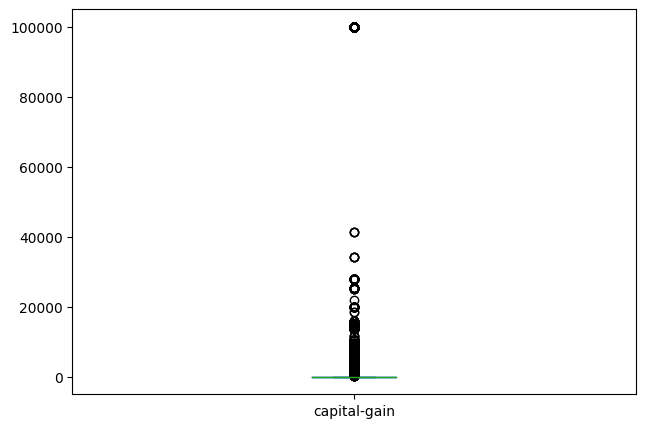

The skewness about capital-gain of the original data is 11.789002180291192
The kurtosis about capital-gain of the original data is 150.15129227909196


C:\Windows\Temp\ipykernel_23312\531174865.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-loss']);


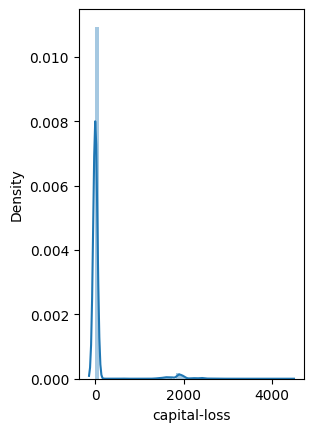

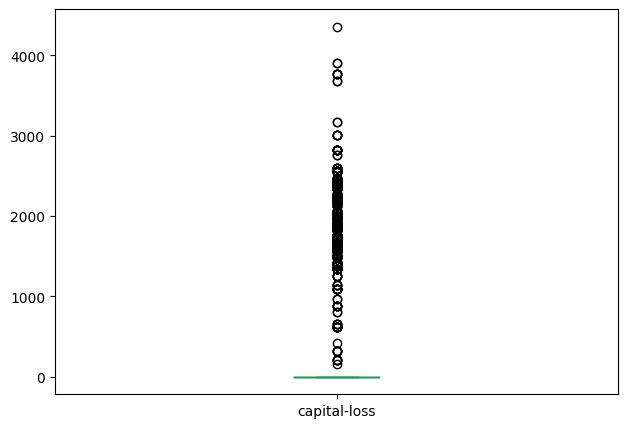

The skewness about capital-loss of the original data is 4.516304152981587
The kurtosis about capital-loss of the original data is 19.36396949822179


C:\Windows\Temp\ipykernel_23312\531174865.py:52: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hours-per-week']);


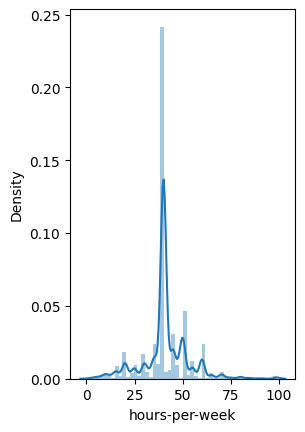

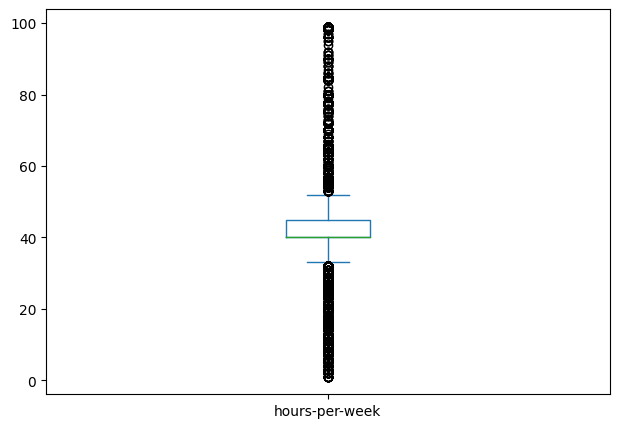

The skewness about hours-per-week of the original data is 0.34054514378520867
The kurtosis about hours-per-week of the original data is 3.201424896002209


In [13]:
# Visualize skewed continuous features of original data
plt.figure(1)
plt.subplot(121)
sns.distplot(data['age']);
plt.show()

plt.subplot(122)
data['age'].plot.box(figsize=(16,5))
plt.show()

print("The skewness about age of the original data is {}".format(data.age.skew()))
print("The kurtosis about age of the original data is {}".format(data.age.kurt()))

plt.figure(2)
plt.subplot(121)
sns.distplot(data['education-num']);
plt.show()

plt.subplot(122)
data['education-num'].plot.box(figsize=(16,5))
plt.show()

print("The skewness about education-num of the original data is {}".format(data['education-num'].skew()))
print("The kurtosis about education-num of the original data is {}".format(data['education-num'].kurt()))

plt.figure(3)
plt.subplot(121)
sns.distplot(data['capital-gain']);
plt.show()

plt.subplot(122)
data['capital-gain'].plot.box(figsize=(16,5))
plt.show()

print("The skewness about capital-gain of the original data is {}".format(data['capital-gain'].skew()))
print("The kurtosis about capital-gain of the original data is {}".format(data['capital-gain'].kurt()))

plt.figure(4)
plt.subplot(121)
sns.distplot(data['capital-loss']);
plt.show()

plt.subplot(122)
data['capital-loss'].plot.box(figsize=(16,5))
plt.show()

print("The skewness about capital-loss of the original data is {}".format(data['capital-loss'].skew()))
print("The kurtosis about capital-loss of the original data is {}".format(data['capital-loss'].kurt()))

plt.figure(5)
plt.subplot(121)
sns.distplot(data['hours-per-week']);
plt.show()

plt.subplot(122)
data['hours-per-week'].plot.box(figsize=(16,5))
plt.show()

print("The skewness about hours-per-week of the original data is {}".format(data['hours-per-week'].skew()))
print("The kurtosis about hours-per-week of the original data is {}".format(data['hours-per-week'].kurt()))


In [14]:
# Outliers Treatment
data['Sqrt_age']=np.sqrt(data['age'])
data['Sqrt_education-num']=np.sqrt(data['education-num'])
data['Sqrt_capital-gain']=np.sqrt(data['capital-gain'])
data['Sqrt_capital-loss']=np.sqrt(data['capital-loss'])
data['Sqrt_hours-per-week']=np.sqrt(data['hours-per-week'])

data['Log_age']=np.log(data['age'])
data['Log_education-num']=np.log(data['education-num'])
data['Log_capital-gain']=np.log(data['capital-gain']+1)
data['Log_capital-loss']=np.log(data['capital-loss']+1)
data['Log_hours-per-week']=np.log(data['hours-per-week'])


In [15]:
print("The skewness about age of the original data is {}".format(data.age.skew()))
print("The skewness about age of the SQRT transformed data is {}".format(data['Sqrt_age'].skew()))
print("The skewness about age of the LOG transformed data is {}".format(data['Log_age'].skew()))
print('')
print("The skewness about education-num of the original data is {}".format(data['education-num'].skew()))
print("The skewness about age of the SQRT transformed data is {}".format(data['Sqrt_education-num'].skew()))
print("The skewness about education-num of the LOG transformed data is {}".format(data['Log_education-num'].skew()))
print('')
print("The skewness about capital-gain of the original data is {}".format(data['capital-gain'].skew()))
print("The skewness about capital-gain of the SQRT data is {}".format(data['Sqrt_capital-gain'].skew()))
print("The skewness about capital-gain of the LOG transformed data is {}".format(data['Log_capital-gain'].skew()))
print('')
print("The skewness about capital-loss of the original data is {}".format(data['capital-loss'].skew()))
print("The skewness about capital-gain of the SQRT data is {}".format(data['Sqrt_capital-loss'].skew()))
print("The skewness about capital-loss of the LOG transformed data is {}".format(data['Log_capital-loss'].skew()))
print('')
print("The skewness about hours-per-week of the original data is {}".format(data['hours-per-week'].skew()))
print("The skewness about capital-gain of the SQRT data is {}".format(data['Sqrt_hours-per-week'].skew()))
print("The skewness about hours-per-week of the LOG transformed data is {}".format(data['Log_hours-per-week'].skew()))
print('')

print("The kurtosis about age of the original data is {}".format(data.age.kurt()))
print("The kurtosis about age of the SQRT transformed data is {}".format(data['Sqrt_age'].kurt()))
print("The kurtosis about age of the LOG transformed data is {}".format(data['Log_age'].kurt()))
print('')
print("The kurtosis about education-num of the original data is {}".format(data['education-num'].kurt()))
print("The kurtosis about education-num of the SQRT transformed data is {}".format(data['Sqrt_education-num'].kurt()))
print("The kurtosis about education-num of the LOG transformed data is {}".format(data['Log_education-num'].kurt()))
print('')
print("The kurtosis about capital-gain of the original data is {}".format(data['capital-gain'].kurt()))
print("The kurtosis about capital-gain of the SQRT transformed data is {}".format(data['Sqrt_capital-gain'].kurt()))
print("The kurtosis about capital-gain of the LOG transformed data is {}".format(data['Log_capital-gain'].kurt()))
print('')
print("The kurtosis about capital-loss of the original data is {}".format(data['capital-loss'].kurt()))
print("The kurtosis about capital-loss of the SQRT transformed data is {}".format(data['Sqrt_capital-loss'].kurt()))
print("The kurtosis about capital-loss of the LOG transformed data is {}".format(data['Log_capital-loss'].kurt()))
print('')
print("The kurtosis about hours-per-week of the original data is {}".format(data['hours-per-week'].kurt()))
print("The kurtosis about hours-per-week of the SQRT transformed data is {}".format(data['Sqrt_hours-per-week'].kurt()))
print("The kurtosis about hours-per-week of the LOG transformed data is {}".format(data['Log_hours-per-week'].kurt()))
print('')

The skewness about age of the original data is 0.5328158942555792
The skewness about age of the SQRT transformed data is 0.17896737910207108
The skewness about age of the LOG transformed data is -0.15725339208264646

The skewness about education-num of the original data is -0.3106209464770189
The skewness about age of the SQRT transformed data is -1.02870180202061
The skewness about education-num of the LOG transformed data is -2.14433138897741

The skewness about capital-gain of the original data is 11.789002180291192
The skewness about capital-gain of the SQRT data is 5.868301862062873
The skewness about capital-gain of the LOG transformed data is 3.082385920215176

The skewness about capital-loss of the original data is 4.516304152981587
The skewness about capital-gain of the SQRT data is 4.332407162741598
The skewness about capital-loss of the LOG transformed data is 4.271194769830899

The skewness about hours-per-week of the original data is 0.34054514378520867
The skewness about 

For age, education-num and hours-per-week, SQRT transformation and log transformation will increase the values of skewness and kurtosis, so above three don't need to do outlier treatments. For capital-gain and capital-loss, log transformation is more closer to 0 and hence is more normal.

In [16]:
#interfence
data=data.drop('Log_age',axis=1)
data=data.drop('Sqrt_age',axis=1)
data=data.drop('Log_education-num',axis=1)
data=data.drop('Sqrt_education-num',axis=1)
data=data.drop('Log_hours-per-week',axis=1)
data=data.drop('Sqrt_hours-per-week',axis=1)
data1=data.copy()
data.drop(columns = ['Log_capital-gain' ,'Sqrt_capital-gain'], inplace=True)
data1.drop(columns=['Sqrt_capital-gain','capital-gain'],inplace=True)
data.drop(columns = ['Log_capital-loss' ,'Sqrt_capital-loss'], inplace=True)
data1.drop(columns=['Sqrt_capital-loss','capital-loss'],inplace=True)

data1.dtypes

age                 float64
workclass            object
education_level      object
education-num       float64
marital-status       object
occupation           object
relationship         object
race                 object
sex                  object
hours-per-week      float64
native-country       object
income               object
Log_capital-gain    float64
Log_capital-loss    float64
dtype: object

Normalization will be used to do scaling on numerical features

In [17]:
# Data Transformation
data2=data1.copy()

from sklearn.preprocessing import MinMaxScaler
model=MinMaxScaler()
numeral = ['age','education-num','Log_capital-gain','Log_capital-loss','hours-per-week']
Min_Max_Scalar=['Min_Max_age','Min_Max_education-num','Min_Max_capital-gain','Min_Max_capital-loss','Min_Max_hours-per-week']
data2[Min_Max_Scalar]=model.fit_transform(data2[numeral])
data2.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,Log_capital-gain,Log_capital-loss,Min_Max_age,Min_Max_education-num,Min_Max_capital-gain,Min_Max_capital-loss,Min_Max_hours-per-week
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,7.684784,0.0,0.301370,0.800000,0.667492,0.0,0.397959
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K,0.000000,0.0,0.452055,0.800000,0.000000,0.0,0.122449
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K,0.000000,0.0,0.287671,0.533333,0.000000,0.0,0.397959
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K,0.000000,0.0,0.493151,0.400000,0.000000,0.0,0.397959
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K,0.000000,0.0,0.150685,0.800000,0.000000,0.0,0.397959


In [18]:
# checking if the skewness and kurtosis post scaling or not:
print("The skewness for the original data is {}.".format(data2.age.skew()))
print("The kurtosis for the original data is {}.".format(data2.age.kurt()))

print('')

print("The skewness for the Min Max Scaled Data is {}.".format(data2['Min_Max_age'].skew()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(data2['Min_Max_age'].kurt()))

print('')

print("The skewness for the original data is {}.".format(data2['education-num'].skew()))
print("The kurtosis for the original data is {}.".format(data2['education-num'].kurt()))

print('')

print("The skewness for the Min Max Scaled Data is {}.".format(data2['Min_Max_education-num'].skew()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(data2['Min_Max_education-num'].kurt()))

print('')

print("The skewness for the original data is {}.".format(data2['Log_capital-gain'].skew()))
print("The kurtosis for the original data is {}.".format(data2['Log_capital-gain'].kurt()))

print('')

print("The skewness for the Min Max Scaled Data is {}.".format(data2['Min_Max_capital-gain'].skew()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(data2['Min_Max_capital-gain'].kurt()))

print('')

print("The skewness for the original data is {}.".format(data2['Log_capital-loss'].skew()))
print("The kurtosis for the original data is {}.".format(data2['Log_capital-loss'].kurt()))

print('')

print("The skewness for the Min Max Scaled Data is {}.".format(data2['Min_Max_capital-loss'].skew()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(data2['Min_Max_capital-loss'].kurt()))

print('')

print("The skewness for the original data is {}.".format(data2['hours-per-week'].skew()))
print("The kurtosis for the original data is {}.".format(data2['hours-per-week'].kurt()))

print('')

print("The skewness for the Min Max Scaled Data is {}.".format(data2['Min_Max_hours-per-week'].skew()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(data2['Min_Max_hours-per-week'].kurt()))

print('')

The skewness for the original data is 0.5328158942555792.
The kurtosis for the original data is -0.15587445202596184.

The skewness for the Min Max Scaled Data is 0.532815894255579.
The kurtosis for the Min Max Scaled Data is -0.15587445202596317.

The skewness for the original data is -0.3106209464770189.
The kurtosis for the original data is 0.6351235822012766.

The skewness for the Min Max Scaled Data is -0.31062094647701927.
The kurtosis for the Min Max Scaled Data is 0.6351235822012771.

The skewness for the original data is 3.082385920215176.
The kurtosis for the original data is 7.706655357544481.

The skewness for the Min Max Scaled Data is 3.0823859202151764.
The kurtosis for the Min Max Scaled Data is 7.706655357544486.

The skewness for the original data is 4.271194769830899.
The kurtosis for the original data is 16.262763077775634.

The skewness for the Min Max Scaled Data is 4.271194769830899.
The kurtosis for the Min Max Scaled Data is 16.262763077775638.

The skewness fo

In [19]:
data_loans=data1.copy()
data_loans[numeral]=model.fit_transform(data_loans[numeral])
data_loans.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,Log_capital-gain,Log_capital-loss
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.397959,United-States,<=50K,0.667492,0.0
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.122449,United-States,<=50K,0.000000,0.0
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.397959,United-States,<=50K,0.000000,0.0
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.397959,United-States,<=50K,0.000000,0.0
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.397959,Cuba,<=50K,0.000000,0.0


In [20]:
# Perform one-hot encoding on the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
features=['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']

enc=OneHotEncoder()
temp_data=enc.fit_transform(np.array(data_loans[features]))
temp_data=temp_data.toarray()
temp=enc.categories_ #temp is  a list

#names=['a']
#names.append('b')
#print(names)
def columns_name(features,categories):
    names=[]
    for m in range(0,len(features)):
        for n in range(0,len(categories[m])):
            names.append(features[m]+'_'+categories[m][n]) 
    return names

temp_names=columns_name(features,temp)
tmp=pd.DataFrame(temp_data,columns=temp_names)
data_processed=pd.concat([data_loans,tmp],axis=1)
data_processed=data_processed.drop(features,axis=1)

#label encoding income
data_loans['income']=LabelEncoder().fit_transform(data_loans['income'])
data_processed=pd.concat([data_processed.drop(['income'],axis=1),data_loans['income']],axis=1)
data_processed



,age,education-num,hours-per-week,Log_capital-gain,Log_capital-loss,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income
0,0.301370,0.800000,0.397959,0.667492,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.452055,0.800000,0.122449,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.287671,0.533333,0.397959,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.493151,0.400000,0.397959,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.150685,0.800000,0.397959,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,0.800000,0.397959,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
45218,0.301370,0.800000,0.357143,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
45219,0.287671,0.800000,0.500000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
45220,0.369863,0.800000,0.397959,0.747375,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### Exercise 3 Shuffle and Split Data

In [21]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
Y=data_processed['income']
X=data_processed.drop(['income'],axis=1)
X.head()
Y.head()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)
Y_train
# print("The shape of X_train is:", X_train.shape)
# print("The shape of X_test is:", X_test.shape)
# print('')
# print("The shape of y_train is:", Y_train.shape)
# print("The shape of y_test is:", Y_test.shape)

13181    0
10342    0
20881    0
24972    1
43867    0
        ..
30403    0
21243    1
42613    1
43567    0
2732     0
Name: income, Length: 36177, dtype: int32

### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

GaussianNB accuracy=  0.5976782752902156
GaussianNB precision=  0.37029667149059337
GaussianNB recall=  0.9283446712018141
GaussianNB F1_score=  0.5294193715246347
GaussianNB F2_score=  0.7133398383049904
GaussianNB TPR=  0.9283446712018141
GaussianNB FPR=  0.5089181286549708


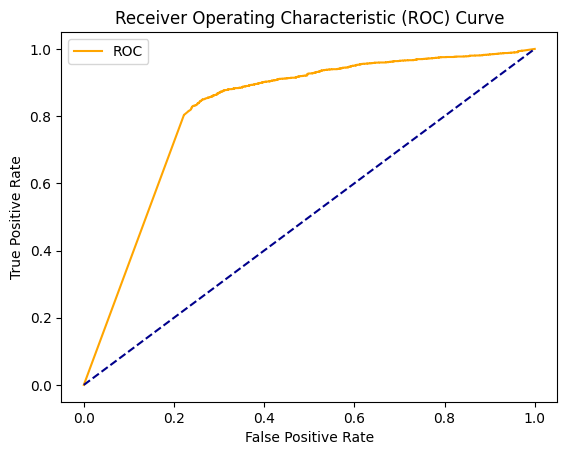

In [22]:
# trainning GaussianNB Model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train,Y_train)


#Evaluating GaussianNB model
from sklearn.metrics import confusion_matrix,accuracy_score
y_prediction_GaussianNB=model_GaussianNB.predict_proba(X_test)
threshold=0.5
y_prediction_class_GaussianNB=y_prediction_GaussianNB[:,1]>threshold
tn_GaussianNB,fp_GaussianNB,fn_GaussianNB,tp_GaussianNB=confusion_matrix(Y_test,y_prediction_class_GaussianNB).ravel()
accuracy_GaussianNB=(tp_GaussianNB+tn_GaussianNB)/(tp_GaussianNB+fp_GaussianNB+tn_GaussianNB+fn_GaussianNB)
print('GaussianNB accuracy= ', accuracy_GaussianNB)
precision_GaussianNB=tp_GaussianNB/(tp_GaussianNB+fp_GaussianNB)
print('GaussianNB precision= ', precision_GaussianNB)
recall_GaussianNB=tp_GaussianNB/(tp_GaussianNB+fn_GaussianNB)
print('GaussianNB recall= ', recall_GaussianNB)
beta1_GaussianNB=1
F1_score_GaussianNB=(1+beta1_GaussianNB*beta1_GaussianNB)*(precision_GaussianNB*recall_GaussianNB)/(beta1_GaussianNB*beta1_GaussianNB*precision_GaussianNB+recall_GaussianNB)
print('GaussianNB F1_score= ', F1_score_GaussianNB)
beta2_GaussianNB=2
F2_score_GaussianNB=(1+beta2_GaussianNB*beta2_GaussianNB)*(precision_GaussianNB*recall_GaussianNB)/(beta2_GaussianNB*beta2_GaussianNB*precision_GaussianNB+recall_GaussianNB)
print('GaussianNB F2_score= ', F2_score_GaussianNB)
tpr_GaussianNB=tp_GaussianNB/(tp_GaussianNB+fn_GaussianNB)
print('GaussianNB TPR= ', tpr_GaussianNB)
fpr_GaussianNB=fp_GaussianNB/(tn_GaussianNB+fp_GaussianNB)
print('GaussianNB FPR= ', fpr_GaussianNB)

fper_GaussianNB,tper_GaussianNB,thresholds_GaussianNB=metrics.roc_curve(Y_test,y_prediction_GaussianNB[:,1])
plt.plot(fper_GaussianNB,tper_GaussianNB,color='orange',label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


DecisionTreeClassifier accuracy=  0.8183526810392482
DecisionTreeClassifier precision=  0.6314312441534145
DecisionTreeClassifier recall=  0.6122448979591837
DecisionTreeClassifier F1_score=  0.6216900759843427
DecisionTreeClassifier F2_score=  0.6159883190363205
DecisionTreeClassifier TPR=  0.6122448979591837
DecisionTreeClassifier FPR=  0.1152046783625731


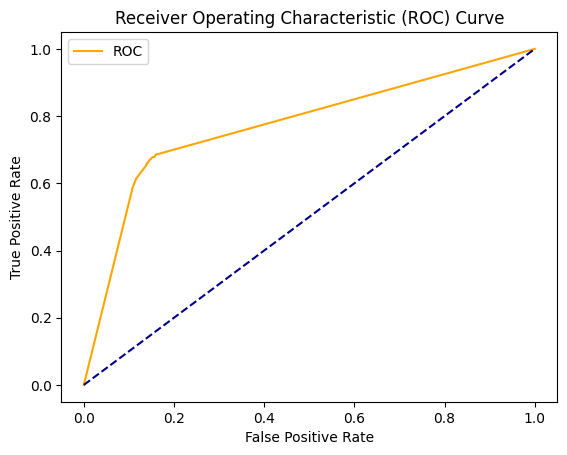

In [23]:
# trainning Decision tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model_DecisionTreeClassifier =DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X_train,Y_train)

#Evaluating DecisionTreeClassifier model
from sklearn.metrics import confusion_matrix,accuracy_score
y_prediction_DecisionTreeClassifier=model_DecisionTreeClassifier.predict_proba(X_test)
threshold=0.5
y_prediction_class_DecisionTreeClassifier=y_prediction_DecisionTreeClassifier[:,1]>threshold
tn_DecisionTreeClassifier,fp_DecisionTreeClassifier,fn_DecisionTreeClassifier,tp_DecisionTreeClassifier=confusion_matrix(Y_test,y_prediction_class_DecisionTreeClassifier).ravel()
accuracy_DecisionTreeClassifier=(tp_DecisionTreeClassifier+tn_DecisionTreeClassifier)/(tp_DecisionTreeClassifier+fp_DecisionTreeClassifier+tn_DecisionTreeClassifier+fn_DecisionTreeClassifier)
print('DecisionTreeClassifier accuracy= ', accuracy_DecisionTreeClassifier)
precision_DecisionTreeClassifier=tp_DecisionTreeClassifier/(tp_DecisionTreeClassifier+fp_DecisionTreeClassifier)
print('DecisionTreeClassifier precision= ', precision_DecisionTreeClassifier)
recall_DecisionTreeClassifier=tp_DecisionTreeClassifier/(tp_DecisionTreeClassifier+fn_DecisionTreeClassifier)
print('DecisionTreeClassifier recall= ', recall_DecisionTreeClassifier)
beta1_DecisionTreeClassifier=1
F1_score_DecisionTreeClassifier=(1+beta1_DecisionTreeClassifier*beta1_DecisionTreeClassifier)*(precision_DecisionTreeClassifier*recall_DecisionTreeClassifier)/(beta1_DecisionTreeClassifier*beta1_DecisionTreeClassifier*precision_DecisionTreeClassifier+recall_DecisionTreeClassifier)
print('DecisionTreeClassifier F1_score= ', F1_score_DecisionTreeClassifier)
beta2_DecisionTreeClassifier=2
F2_score_DecisionTreeClassifier=(1+beta2_DecisionTreeClassifier*beta2_DecisionTreeClassifier)*(precision_DecisionTreeClassifier*recall_DecisionTreeClassifier)/(beta2_DecisionTreeClassifier*beta2_DecisionTreeClassifier*precision_DecisionTreeClassifier+recall_DecisionTreeClassifier)
print('DecisionTreeClassifier F2_score= ', F2_score_DecisionTreeClassifier)
tpr_DecisionTreeClassifier=tp_DecisionTreeClassifier/(tp_DecisionTreeClassifier+fn_DecisionTreeClassifier)
print('DecisionTreeClassifier TPR= ', tpr_DecisionTreeClassifier)
fpr_DecisionTreeClassifier=fp_DecisionTreeClassifier/(tn_DecisionTreeClassifier+fp_DecisionTreeClassifier)
print('DecisionTreeClassifier FPR= ', fpr_DecisionTreeClassifier)

fper_DecisionTreeClassifier,tper_DecisionTreeClassifier,thresholds_DecisionTreeClassifier=metrics.roc_curve(Y_test,y_prediction_DecisionTreeClassifier[:,1])
plt.plot(fper_DecisionTreeClassifier,tper_DecisionTreeClassifier,color='orange',label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

RandomForestClassifier accuracy=  0.8414593698175787
RandomForestClassifier precision=  0.69558599695586
RandomForestClassifier recall=  0.6217687074829932
DecisionTreeClassifier F1_score=  0.6216900759843427
RandomForestClassifier F2_score=  0.6352515985543509
RandomForestClassifier TPR=  0.6217687074829932
RandomForestClassifier FPR=  0.08771929824561403


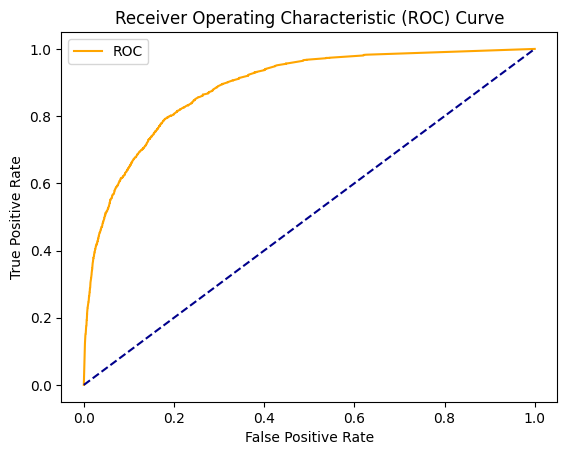

In [24]:
# trainning random forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_RandomForestClassifier =RandomForestClassifier()
model_RandomForestClassifier.fit(X_train,Y_train)

#Evaluating random forest model
from sklearn.metrics import confusion_matrix,accuracy_score
y_prediction_RandomForestClassifier=model_RandomForestClassifier.predict_proba(X_test)
threshold=0.5
y_prediction_class_RandomForestClassifier=y_prediction_RandomForestClassifier[:,1]>threshold
tn_RandomForestClassifier,fp_RandomForestClassifier,fn_RandomForestClassifier,tp_RandomForestClassifier=confusion_matrix(Y_test,y_prediction_class_RandomForestClassifier).ravel()
accuracy_RandomForestClassifier=(tp_RandomForestClassifier+tn_RandomForestClassifier)/(tp_RandomForestClassifier+fp_RandomForestClassifier+tn_RandomForestClassifier+fn_RandomForestClassifier)
print('RandomForestClassifier accuracy= ', accuracy_RandomForestClassifier)
precision_RandomForestClassifier=tp_RandomForestClassifier/(tp_RandomForestClassifier+fp_RandomForestClassifier)
print('RandomForestClassifier precision= ', precision_RandomForestClassifier)
recall_RandomForestClassifier=tp_RandomForestClassifier/(tp_RandomForestClassifier+fn_RandomForestClassifier)
print('RandomForestClassifier recall= ', recall_RandomForestClassifier)
beta1_RandomForestClassifier=1
F1_score_RandomForestClassifier=(1+beta1_RandomForestClassifier*beta1_RandomForestClassifier)*(precision_RandomForestClassifier*recall_RandomForestClassifier)/(beta1_RandomForestClassifier*beta1_RandomForestClassifier*precision_RandomForestClassifier+recall_RandomForestClassifier)
print('DecisionTreeClassifier F1_score= ', F1_score_DecisionTreeClassifier)
beta2_RandomForestClassifier=2
F2_score_RandomForestClassifier=(1+beta2_RandomForestClassifier*beta2_RandomForestClassifier)*(precision_RandomForestClassifier*recall_RandomForestClassifier)/(beta2_RandomForestClassifier*beta2_RandomForestClassifier*precision_RandomForestClassifier+recall_RandomForestClassifier)
print('RandomForestClassifier F2_score= ', F2_score_RandomForestClassifier)
tpr_RandomForestClassifier=tp_RandomForestClassifier/(tp_RandomForestClassifier+fn_RandomForestClassifier)
print('RandomForestClassifier TPR= ', tpr_RandomForestClassifier)
fpr_RandomForestClassifier=fp_RandomForestClassifier/(tn_RandomForestClassifier+fp_RandomForestClassifier)
print('RandomForestClassifier FPR= ', fpr_RandomForestClassifier)

fper_RandomForestClassifier,tper_RandomForestClassifier,thresholds_RandomForestClassifier=metrics.roc_curve(Y_test,y_prediction_RandomForestClassifier[:,1])
plt.plot(fper_RandomForestClassifier,tper_RandomForestClassifier,color='orange',label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


LogisticRegression accuracy=  0.8420121614151465
LogisticRegression precision=  0.7095032397408207
LogisticRegression recall=  0.5959183673469388
LogisticRegression F1_score=  0.6477692876509736
LogisticRegression F2_score=  0.6156296851574213
LogisticRegression TPR=  0.5959183673469388
LogisticRegression FPR=  0.07865497076023392


d:\Anaconda3\Anaconda\envs\dip\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


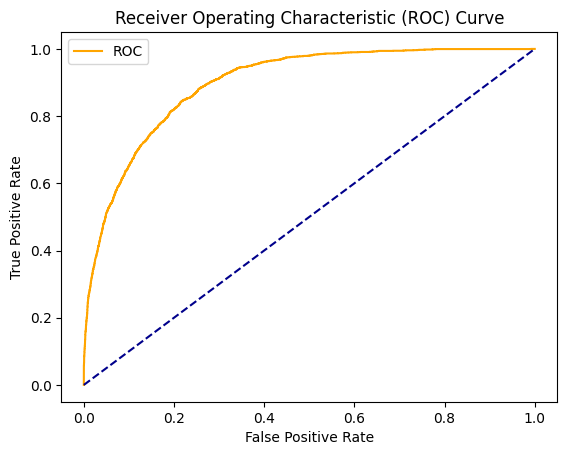

In [25]:
# trainning logistic regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_LogisticRegression =LogisticRegression()
model_LogisticRegression.fit(X_train,Y_train)

#Evaluating logistic regression model
from sklearn.metrics import confusion_matrix,accuracy_score
y_prediction_LogisticRegression=model_LogisticRegression.predict_proba(X_test)
threshold=0.5
y_prediction_class_LogisticRegression=y_prediction_LogisticRegression[:,1]>threshold
tn_LogisticRegression,fp_LogisticRegression,fn_LogisticRegression,tp_LogisticRegression=confusion_matrix(Y_test,y_prediction_class_LogisticRegression).ravel()
accuracy_LogisticRegression=(tp_LogisticRegression+tn_LogisticRegression)/(tp_LogisticRegression+fp_LogisticRegression+tn_LogisticRegression+fn_LogisticRegression)
print('LogisticRegression accuracy= ', accuracy_LogisticRegression)
precision_LogisticRegression=tp_LogisticRegression/(tp_LogisticRegression+fp_LogisticRegression)
print('LogisticRegression precision= ', precision_LogisticRegression)
recall_LogisticRegression=tp_LogisticRegression/(tp_LogisticRegression+fn_LogisticRegression)
print('LogisticRegression recall= ', recall_LogisticRegression)
beta1_LogisticRegression=1
F1_score_LogisticRegression=(1+beta1_LogisticRegression*beta1_LogisticRegression)*(precision_LogisticRegression*recall_LogisticRegression)/(beta1_LogisticRegression*beta1_LogisticRegression*precision_LogisticRegression+recall_LogisticRegression)
print('LogisticRegression F1_score= ', F1_score_LogisticRegression)
beta2_LogisticRegression=2
F2_score_LogisticRegression=(1+beta2_LogisticRegression*beta2_LogisticRegression)*(precision_LogisticRegression*recall_LogisticRegression)/(beta2_LogisticRegression*beta2_LogisticRegression*precision_LogisticRegression+recall_LogisticRegression)
print('LogisticRegression F2_score= ', F2_score_LogisticRegression)
tpr_LogisticRegression=tp_LogisticRegression/(tp_LogisticRegression+fn_LogisticRegression)
print('LogisticRegression TPR= ', tpr_LogisticRegression)
fpr_LogisticRegression=fp_LogisticRegression/(tn_LogisticRegression+fp_LogisticRegression)
print('LogisticRegression FPR= ', fpr_LogisticRegression)

fper_LogisticRegression,tper_LogisticRegression,thresholds_LogisticRegression=metrics.roc_curve(Y_test,y_prediction_LogisticRegression[:,1])
plt.plot(fper_LogisticRegression,tper_LogisticRegression,color='orange',label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

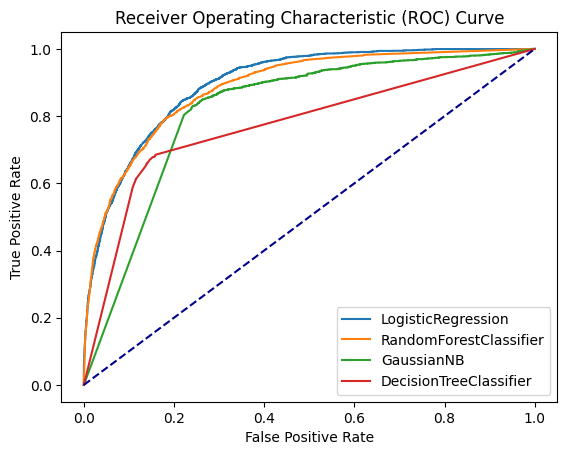

In [26]:
fper_GaussianNB,tper_GaussianNB,thresholds_GaussianNB=metrics.roc_curve(Y_test,y_prediction_GaussianNB[:,1])
fper_DecisionTreeClassifier,tper_DecisionTreeClassifier,thresholds_DecisionTreeClassifier=metrics.roc_curve(Y_test,y_prediction_DecisionTreeClassifier[:,1])
fper_RandomForestClassifier,tper_RandomForestClassifier,thresholds_RandomForestClassifier=metrics.roc_curve(Y_test,y_prediction_RandomForestClassifier[:,1])
fper_LogisticRegression,tper_LogisticRegression,thresholds_LogisticRegression=metrics.roc_curve(Y_test,y_prediction_LogisticRegression[:,1])
plt.plot(fper_LogisticRegression,tper_LogisticRegression,label='LogisticRegression')
plt.plot(fper_RandomForestClassifier,tper_RandomForestClassifier,label='RandomForestClassifier')
plt.plot(fper_GaussianNB,tper_GaussianNB,label='GaussianNB')
plt.plot(fper_DecisionTreeClassifier,tper_DecisionTreeClassifier,label='DecisionTreeClassifier')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [27]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

### Exercise 5 Evaluating Model 

## Question:
### Q1:

Text(0.5, 1.0, 'Importance ranking of random forest')

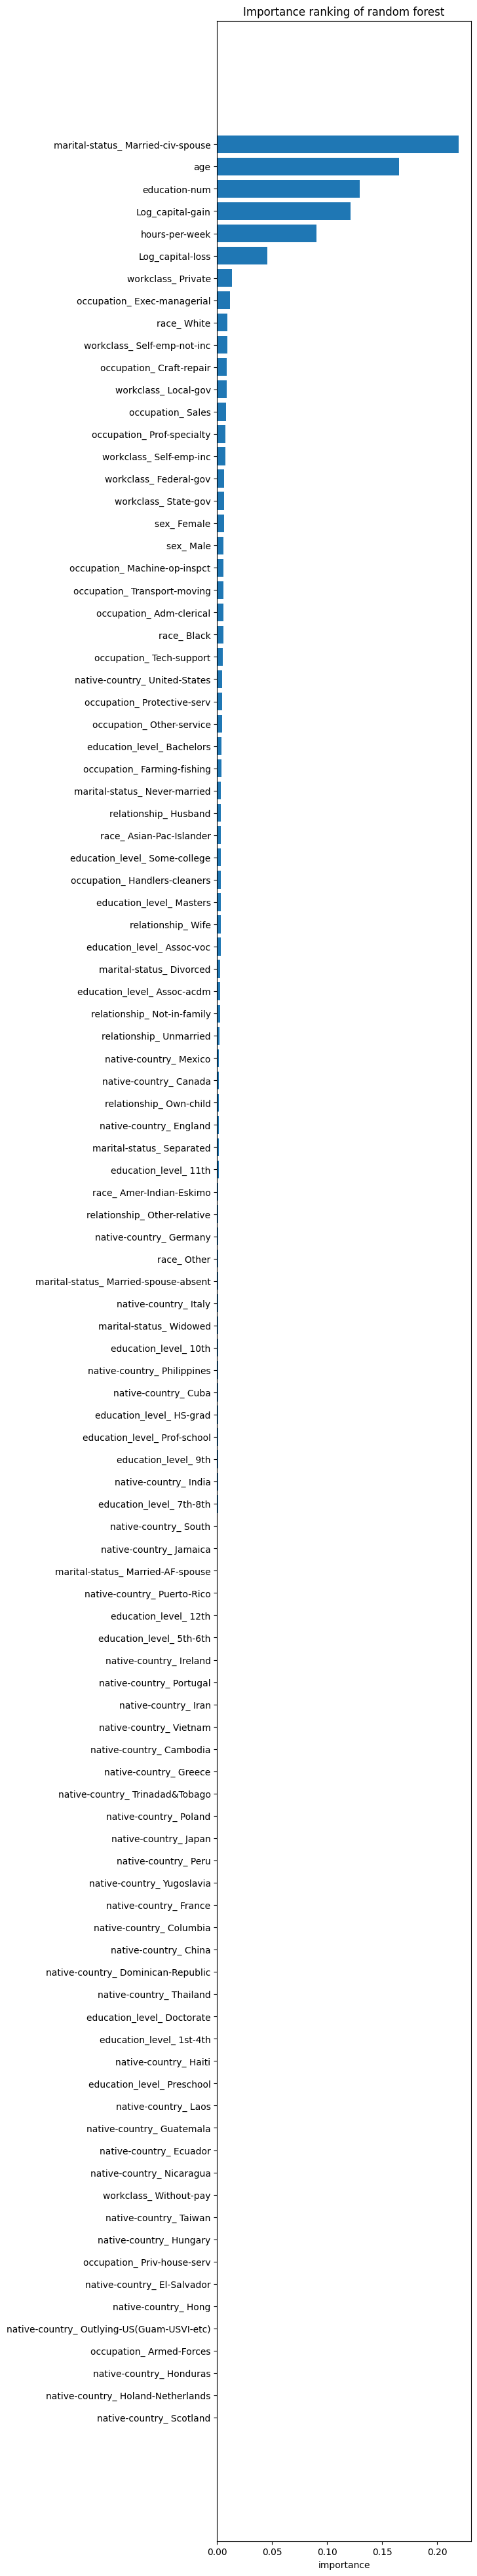

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_RandomForestClassifier =RandomForestClassifier()
model_RandomForestClassifier.fit(X_train,Y_train)
FI=pd.Series(model_DecisionTreeClassifier.feature_importances_,index=X_train.columns)
FI = FI.sort_values(ascending = True)
fig = plt.figure(figsize=(5,50))
plt.barh(FI.index,FI.values)
plt.xlabel('importance')
plt.title('Importance ranking of random forest')

Text(0.5, 1.0, 'Importance ranking of decision tree')

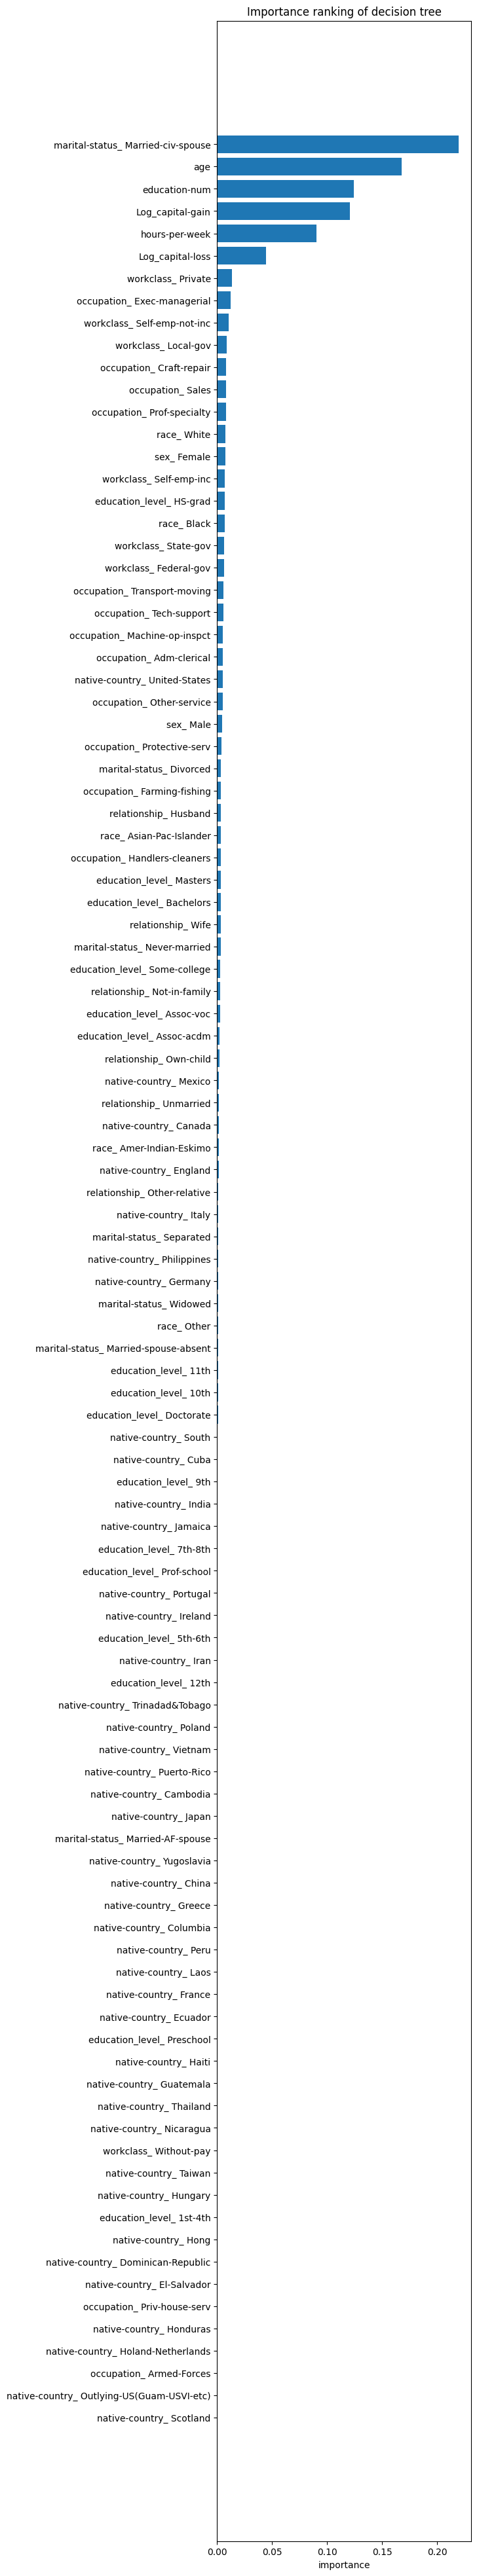

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model_DecisionTreeClassifier =DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X_train,Y_train)

FI=pd.Series(model_DecisionTreeClassifier.feature_importances_,index=X_train.columns)
FI = FI.sort_values(ascending = True)
fig = plt.figure(figsize=(5,50))
plt.barh(FI.index,FI.values)
plt.xlabel('importance')
plt.title('Importance ranking of decision tree')

### Q2:

A Random Forest model can be used in industry is in the field of credit risk assessment for banks and financial institutions. Banks and lending institutions use Randon Forest models to access the creditworthiness of individuals and business applying for loans or credit lines.

### Q3:

**Strengths**\
(1) The default ability to correct for decision trees’ habit of overfitting to their training set. Even if some data is missing, Random Forest will maintain its accuracy.\
(2) more efficient on a large database.\
(3) Less complicated. Random Forest is set up in a way that allows for quick development with minimal hyper-paraneters, which makes for less set up time.\
(4) It can be used for classification or regression\
**When perform well**\
(1) high-dimensional data: datasets with a large number of features.\
(2) large datasets: parallelize the training process.\
(3) mixed data types: handle a mix of numerical and categorical features.\
(4) nonlinear relationships: capture complex non linear relationships.\
(5) outliers: robust to outliers in data.\
(6) missing data: handle missing data without the need for imputation.\
(7) feature importance: the way to rank the importance of features can be useful for features selection or understanding of the data.

### Q4

**weakness**\
(1) require more memory for larger projects because of the use of many decision tress.\
(2) the speed of process can be slowed down because of the prevention of overfitting.\
**When perform poorly**\
(1) small datasets: when there isn't enough data to create diverse trees, overfitting will occur.\
(2) linear relationships: when the relationship between features and the target variable is primarily linear, the performance of Random Forest may be worse than that of some simple models, such as linear regression.\
(3) Highly correlated features: redunbant features can lead to decreased model performance and decreased interpretability of feature importance.

### Q5

According to the importance ranking of Random Forest model and decision trees model, the features that provides significant predictive power are marital-status_Married-civ-spouse, age, education-num, capital-gain, hours-per-week and capital-loss. 

In my opinion, there are 5 reasons which makes Random Forest model a good candidate for the problem.\
(1) The dataset `census.csv` contains a large number of features, which makes the model less prone to overfitting compared to other models in the case.\
(2) The dataset `census.csv` is so large that Random Forest can efficiently parallelize the training process.\
(3) The dataset `census.csv` cintains a mix of numerical and categorical features, which can be better handled by Random Forest model.\
(4) The realtionship between features and target variables in this dataset is nonlinear.\
(5)  The features in the dataset `census.csv` is uncorrelated, which can lead to increased model performance and increased interpretability of feature importance. 